In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load the dataset
dfr = pd.read_csv('letters.csv')


In [3]:
dfr.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [4]:
dfr.shape

(42000, 46)

In [5]:
dfr.isnull().sum() #NA value check

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64

In [6]:
dfr.duplicated().sum()

1633

In [7]:
dp_rows = dfr[dfr.duplicated()]
print(dp_rows)

       label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  \
50         7        0        0        0         0         0         0   
376        5        0        0        0         0         0         0   
412        5        0        0        0         0         0         0   
451        4        0        0        0         0         0         0   
501        5        0        0        0         0         0         0   
...      ...      ...      ...      ...       ...       ...       ...   
40792      5        0        0        0         0         0         0   
40797      9        0        0        0         0         0         0   
40820      9        0        0        0         0         0         0   
40846      7        0        0        0         0         0         0   
40848      9        0        0        0         0         0         0   

       pixel127  pixel128  pixel129  ...  pixel329  pixel351  pixel410  \
50            0         0         0  ...         

In [8]:
#dfr = dfr.drop_duplicates() #Removed duplicate rows
dfr.duplicated().sum()

1633

In [9]:
dfr.describe()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,4.456643,0.171357,0.164476,1.192833,28.043952,36.084976,42.713952,46.092310,44.542452,38.948524,...,42.461048,102.124119,107.683952,79.750548,56.31481,39.244643,25.754262,14.858619,5.844476,0.829643
std,2.887730,5.726352,5.515774,14.692403,70.505431,78.631145,84.390533,87.287033,85.740313,81.223946,...,85.090524,110.961953,111.360981,104.287852,94.20847,82.799118,69.597297,54.018163,33.293343,11.818307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,39.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,29.000000,21.000000,0.000000,...,10.000000,247.000000,250.000000,191.000000,86.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Split features and target variable
X = dfr.drop('label', axis=1).values
y = dfr['label'].values

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the KNN model
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time
print("Time taken to generate KNN output:", execution_time, "seconds")

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Time taken to generate KNN output: 0.5438179969787598 seconds
KNN Accuracy: 0.6658333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       861
           1       0.77      0.96      0.85       971
           2       0.69      0.62      0.65       817
           3       0.61      0.56      0.59       834
           4       0.70      0.52      0.60       802
           5       0.67      0.56      0.61       744
           6       0.83      0.87      0.85       821
           7       0.48      0.63      0.55       914
           8       0.63      0.52      0.57       789
           9       0.47      0.47      0.47       847

    accuracy                           0.67      8400
   macro avg       0.67      0.66      0.66      8400
weighted avg       0.67      0.67      0.66      8400



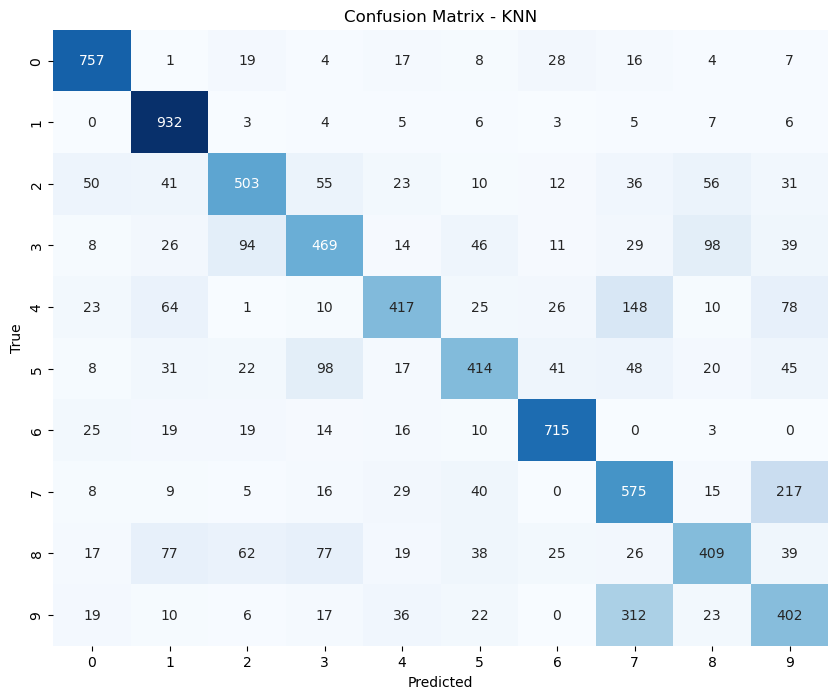

In [12]:
# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [13]:
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"KNN Accuracy for k={k}: {accuracy_knn}")

KNN Accuracy for k=1: 0.6146428571428572
KNN Accuracy for k=2: 0.6092857142857143
KNN Accuracy for k=3: 0.6272619047619048
KNN Accuracy for k=4: 0.6407142857142857
KNN Accuracy for k=5: 0.6488095238095238
KNN Accuracy for k=6: 0.6573809523809524
KNN Accuracy for k=7: 0.6598809523809523
KNN Accuracy for k=8: 0.6621428571428571
KNN Accuracy for k=9: 0.6627380952380952
KNN Accuracy for k=10: 0.6613095238095238
KNN Accuracy for k=11: 0.6625
KNN Accuracy for k=12: 0.6661904761904762
KNN Accuracy for k=13: 0.6658333333333334
KNN Accuracy for k=14: 0.6669047619047619
KNN Accuracy for k=15: 0.6638095238095238


KNN error for k=1: 0.38535714285714284
KNN error for k=2: 0.3907142857142857
KNN error for k=3: 0.3727380952380952
KNN error for k=4: 0.3592857142857143
KNN error for k=5: 0.35119047619047616
KNN error for k=6: 0.3426190476190476
KNN error for k=7: 0.34011904761904765
KNN error for k=8: 0.33785714285714286
KNN error for k=9: 0.33726190476190476
KNN error for k=10: 0.3386904761904762
KNN error for k=11: 0.3375
KNN error for k=12: 0.3338095238095238
KNN error for k=13: 0.3341666666666666
KNN error for k=14: 0.3330952380952381
KNN error for k=15: 0.33619047619047615


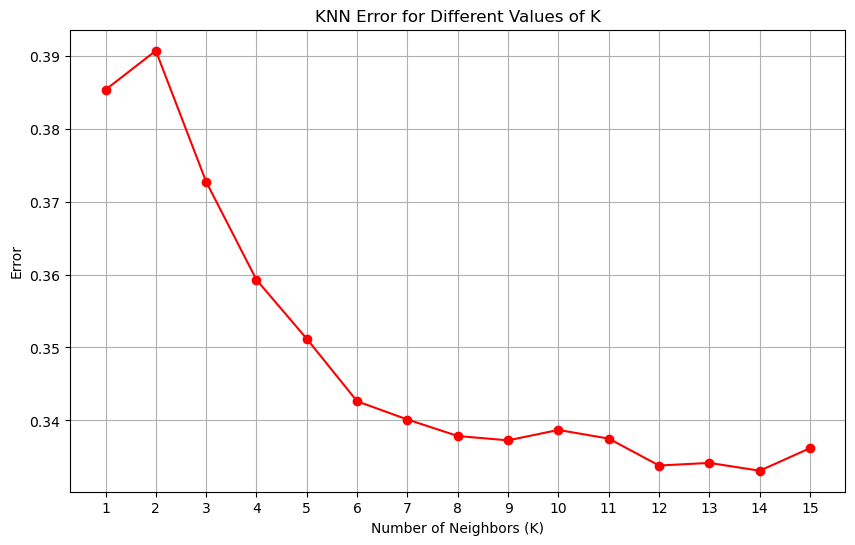

In [21]:
# Lists to store errors
k_values = []
errors = []

# Loop through different values of K and calculate errors
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, y_pred_knn)  # Calculate error as 1 - accuracy
    k_values.append(k)
    errors.append(error)
    print(f"KNN error for k={k}: {error}")

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='r')
plt.title('KNN Error for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.xticks(np.arange(1, 16, 1))
plt.grid(True)
plt.show()

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import time

# Normalize input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the MLPClassifier model
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(128, 100, 80, 60, 40, 20, 10), 
                    activation='relu', 
                    solver='adam',
                    learning_rate ='adaptive',
                    learning_rate_init=0.001, 
                    alpha=0.0001, 
                    max_iter=40, 
                    random_state=42)

mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Calculate the execution time
end_time = time.time()
execution_time = end_time - start_time
print("Time taken to generate neural network output:", execution_time, "seconds")

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", accuracy_mlp)
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))



Time taken to generate neural network output: 14.90700387954712 seconds
MLP Accuracy: 0.7035714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       861
           1       0.88      0.93      0.91       971
           2       0.68      0.71      0.69       817
           3       0.63      0.64      0.63       834
           4       0.87      0.53      0.66       802
           5       0.66      0.67      0.67       744
           6       0.83      0.92      0.88       821
           7       0.52      0.66      0.58       914
           8       0.64      0.55      0.59       789
           9       0.51      0.50      0.50       847

    accuracy                           0.70      8400
   macro avg       0.71      0.70      0.70      8400
weighted avg       0.71      0.70      0.70      8400



P:\DataSoftwares2024\PYTHON\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


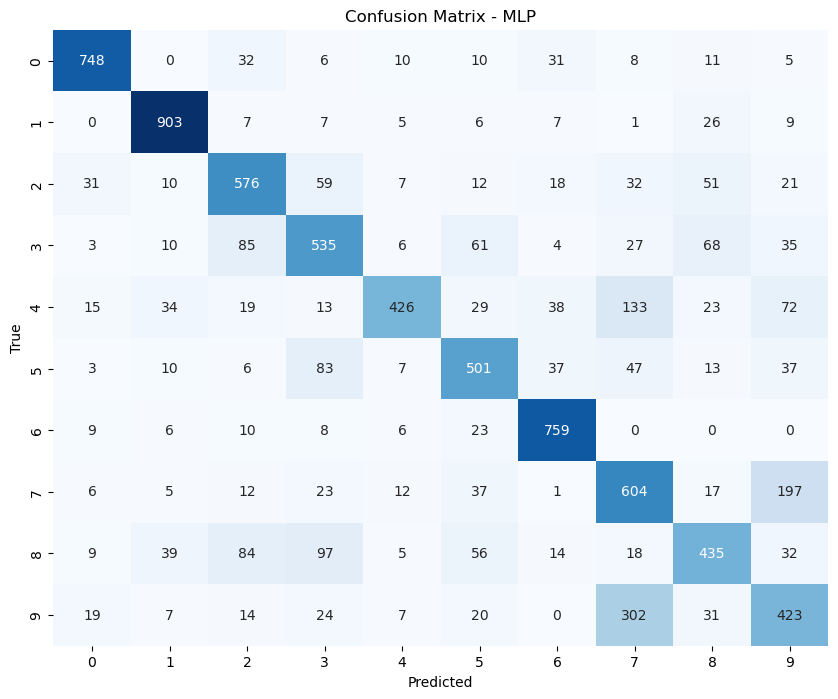

In [17]:
# Compute confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
import pandas as pd

# Define metrics for KNN model
knn_metrics = {
    'Model': 'KNN',
    'Accuracy': 0.6658,
    'Precision': 0.67,
    'Recall': 0.66,
    'F1-score': 0.66,
    'Training Time (s)': 0.5438
}

# Define metrics for Neural Network model
nn_metrics = {
    'Model': 'Neural Network',
    'Accuracy': 0.7036,
    'Precision': 0.71,
    'Recall': 0.70,
    'F1-score': 0.70,
    'Training Time (s)': 14.907
}

# Convert dictionaries to pandas DataFrame
df_metrics = pd.DataFrame([knn_metrics, nn_metrics])

# Display the DataFrame
df_metrics


,Model,Accuracy,Precision,Recall,F1-score,Training Time (s)
0,KNN,0.6658,0.67,0.66,0.66,0.5438
1,Neural Network,0.7036,0.71,0.70,0.70,14.9070
